In [5]:
import streamlit as st

In [111]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [70]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import string
from collections import Counter
import re
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [49]:
covid = pd.read_csv("../../data/Dimension-covid.csv") # For Pre Processing
covid_bk = pd.read_csv("../../data/Dimension-covid.csv") # For results

In [36]:
covid.shape

(10666, 21)

In [37]:
covid.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [38]:
covid.Abstract[0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

## Functions for Text Pre Processing

In [39]:
sw = stopwords.words("english")
tokenizer = RegexpTokenizer(r'[A-z]+')
lemmatizer = WordNetLemmatizer()

In [50]:
# 1. Convert all text to lower case
def text_tolower(text):
    return text.lower()

# 2. Function to remove URLs
def remove_urls(text):
    new_text = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    return new_text

# 3. Get rid of numbers
def remove_numbers(text):
    '''
    if text is None or "nan" or pd.NA or np.NaN:
        return text
    else:
    '''
    return re.sub(r"\d+", " ", text)

# 4. Remove Punctuation
def remove_punctuation(text):
    translator = str.maketrans("","", string.punctuation)
    return text.translate(translator)

# 5. Word Tokenizer

def tokenize(text):
    return word_tokenize(text)

# 6. Remove StopWords
def remove_stopwords(text):
    return [word for word in text if word not in sw]

# 7. Lemmatize Words
def lemmatize(text):
    return [lemmatizer.lemmatize(token) for token in text]

def preprocess_text(text):

    text = remove_numbers(text)
    text = text_tolower(text)
    
    text = remove_urls(text)
    text = remove_punctuation(text)

    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    
    text = " ".join(text)
    text = re.sub("\n", " ", text)
    return text



In [51]:
covid["Abstract"] = covid["Abstract"].apply(lambda x: preprocess_text(str(x)))

In [52]:
print(covid["Abstract"].loc[3814])
print(covid["Abstract"].loc[4533])
print(covid["Abstract"].loc[858])

nan
covid
covid


In [73]:
covid["Abstract"] = covid["Abstract"].apply(lambda x: x.split())

In [67]:
covid["Title"] = covid["Title"].apply(lambda x: preprocess_text(str(x)))

In [68]:
print(covid["Title"].loc[3814])
print(covid["Title"].loc[4533])
print(covid["Title"].loc[858])

multi centre adaptive randomized double blind placebo controlled comparative clinical trial safety efficacy mg polyoxidonium lyophilizate solution injection npo petrovax pharm llc russia patient coronavirus disease covid
adalimumab covid present respiratory failure community care avid cc randomised controlled trial
double blind placebo controlled interventional parallel group study evaluate antiviral effect single nasal application ltx gel comparison placebo gel subject covid infection


In [74]:
covid["Title"] = covid["Title"].apply(lambda x: x.split())

In [69]:
print(covid_bk["Abstract"].loc[3814])
print(covid_bk["Abstract"].loc[4533])
print(covid_bk["Abstract"].loc[858])

nan
COVID-19
COVID-19


In [77]:
count_Abstract = Counter(covid.explode(column="Abstract")["Abstract"].to_list())
len(count_Abstract.keys())

In [81]:
count_Title = Counter(covid.explode(column="Title")["Title"].to_list())
len(count_Title.keys())

10503

In [88]:
i = 10080
print(covid.Abstract[i], len(covid.Abstract[i]))

['study', 'intends', 'conduct', 'retrospective', 'study', 'case', 'patient', 'admitted', 'designated', 'hospital', 'treatment', 'new', 'coronavirus', 'pneumonia', 'therapeutic', 'drug', 'used', 'inpatient', 'designated', 'hospital', 'analyzed', 'aspect', 'efficacy', 'rationality', 'safety', 'combined', 'use', 'order', 'provide', 'data', 'support', 'treatment', 'new', 'coronavirus', 'pneumonia', 'provide', 'reliable', 'basis', 'rational', 'use', 'drug'] 41


In [96]:
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap
from pandas.core.common import flatten
stopwords = set(STOPWORDS) 

In [95]:
All_Words = flatten(covid.Abstract)
All_Words = " ".join(All_Words)

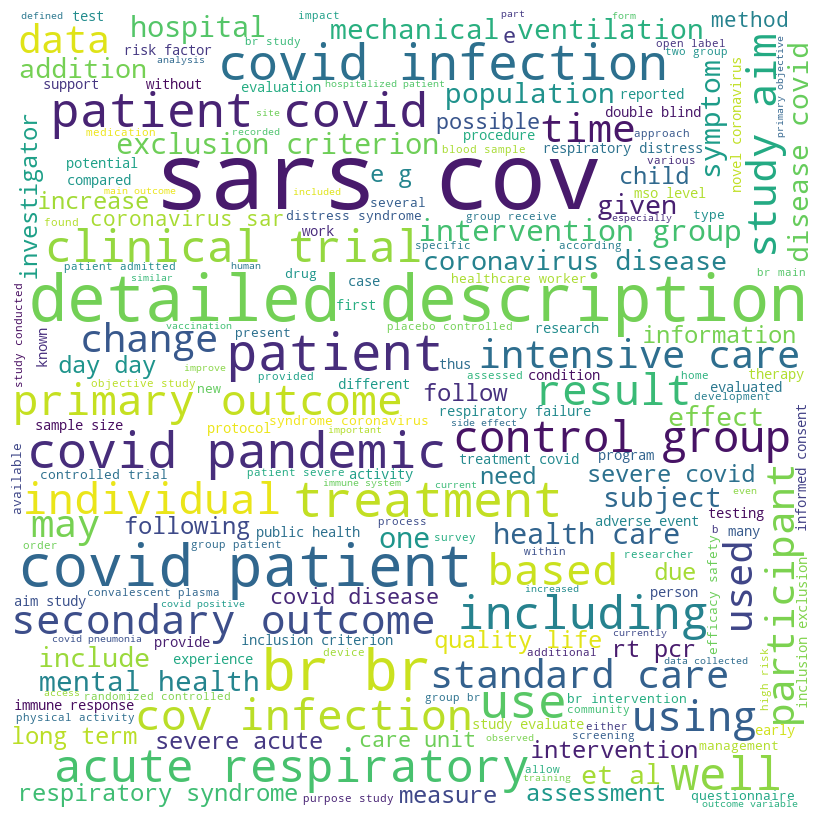

In [97]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(All_Words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## Training the Skip-Gram Model

In [98]:
skipgram = Word2Vec(covid.Abstract, vector_size =50, window = 3, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')

Word2Vec<vocab=24824, vector_size=50, alpha=0.025>


In [100]:
# Print some basic information about the model
print("Vocabulary size:", len(skipgram.wv))
print("Vector size:", skipgram.wv.vector_size)
print("Number of epochs trained:", skipgram.epochs)

# Access word embeddings
word_embedding = skipgram.wv['sars']  # Replace 'word' with the word you want to access

# Similarity between words
similarity_score = skipgram.wv.similarity('sars', 'covid')  # Replace 'word1' and 'word2' with the words you want to compare
print("Similarity score:", similarity_score)

Vocabulary size: 24824
Vector size: 50
Number of epochs trained: 5
Similarity score: 0.8207285


In [102]:
skipgram = Word2Vec(covid.Abstract, vector_size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx11.bin')

Word2Vec<vocab=24824, vector_size=100, alpha=0.025>


In [103]:
# Print some basic information about the model
print("Vocabulary size:", len(skipgram.wv))
print("Vector size:", skipgram.wv.vector_size)
print("Number of epochs trained:", skipgram.epochs)

# Access word embeddings
word_embedding = skipgram.wv['sars']  # Replace 'word' with the word you want to access

# Similarity between words
similarity_score = skipgram.wv.similarity('sars', 'covid')  # Replace 'word1' and 'word2' with the words you want to compare
print("Similarity score:", similarity_score)

Vocabulary size: 24824
Vector size: 100
Number of epochs trained: 5
Similarity score: 0.7935914


In [130]:
skipgram = Word2Vec(covid.Abstract, vector_size =100, window = 10, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx2.bin')
# Print some basic information about the model
print("Vocabulary size:", len(skipgram.wv))
print("Vector size:", skipgram.wv.vector_size)
print("Number of epochs trained:", skipgram.epochs)

# Access word embeddings
word_embedding = skipgram.wv['sars']  # Replace 'word' with the word you want to access

# Similarity between words
similarity_score = skipgram.wv.similarity('sars', 'covid')  # Replace 'word1' and 'word2' with the words you want to compare
print("Similarity score:", similarity_score)

Word2Vec<vocab=24824, vector_size=100, alpha=0.025>
Vocabulary size: 24824
Vector size: 100
Number of epochs trained: 5
Similarity score: 0.7813272


In [131]:
# Loading the model
skipgram = Word2Vec.load('skipgramx2.bin')
# Print some basic information about the model
print("Vocabulary size:", len(skipgram.wv))
print("Vector size:", skipgram.wv.vector_size)
print("Number of epochs trained:", skipgram.epochs)

Vocabulary size: 24824
Vector size: 100
Number of epochs trained: 5


## Training FastText Model

In [132]:
FastText_model=FastText(covid.Abstract,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
FastText_model.save('FastText.bin')    #Saving our model
FastText_model = Word2Vec.load('FastText.bin')  #Loading our pretrained model

# Print some basic information about the model
print("Vocabulary size:", len(FastText_model.wv))
print("Vector size:", FastText_model.wv.vector_size)
print("Number of epochs trained:", FastText_model.epochs)

# Access word embeddings
word_embedding = FastText_model.wv['sars']  # Replace 'word' with the word you want to access

# Similarity between words
similarity_score = FastText_model.wv.similarity('sars', 'covid')  # Replace 'word1' and 'word2' with the words you want to compare
print("Similarity score:", similarity_score)

Vocabulary size: 24824
Vector size: 100
Number of epochs trained: 5
Similarity score: 0.71323866


In [133]:
FastText_model=FastText(covid.Abstract,vector_size=100, window=2, min_count=2, workers=10, min_n=1, max_n=2,sg=1)
FastText_model.save('FastText.bin')    #Saving our model
FastText_model = Word2Vec.load('FastText.bin')  #Loading our pretrained model

# Print some basic information about the model
print("Vocabulary size:", len(FastText_model.wv))
print("Vector size:", FastText_model.wv.vector_size)
print("Number of epochs trained:", FastText_model.epochs)

# Access word embeddings
word_embedding = FastText_model.wv['sars']  # Replace 'word' with the word you want to access

# Similarity between words
similarity_score = FastText_model.wv.similarity('sars', 'covid')  # Replace 'word1' and 'word2' with the words you want to compare
print("Similarity score:", similarity_score)

Vocabulary size: 24824
Vector size: 100
Number of epochs trained: 5
Similarity score: 0.7475983


## Model Embeddings - Similarity

In [134]:
# Similar words - skipgram
skipgram.wv.most_similar(positive=["corona"],topn=10)

[('coronavirus', 0.7456191182136536),
 ('provisionally', 0.7021253108978271),
 ('renamed', 0.6952770352363586),
 ('coronovirus', 0.6818022131919861),
 ('ictv', 0.6765167117118835),
 ('incepted', 0.6729224920272827),
 ('nominated', 0.6728305220603943),
 ('belongs', 0.6716902256011963),
 ('sease', 0.6685487031936646),
 ('breakout', 0.6667535305023193)]

In [135]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('capa', 0.7646149396896362),
 ('hemodialysed', 0.7503229975700378),
 ('corvid', 0.7484798431396484),
 ('markazi', 0.743189811706543),
 ('covid', 0.7401720285415649),
 ('hypoxaemic', 0.7381823658943176),
 ('contemporaneous', 0.7181114554405212),
 ('noa', 0.7164802551269531),
 ('admittance', 0.7136507034301758),
 ('unmc', 0.7111576795578003)]

In [136]:
skipgram.wv.most_similar(positive=['diabetes'],topn=10)

[('mellitus', 0.8996079564094543),
 ('hypertension', 0.8283047676086426),
 ('dm', 0.7698138356208801),
 ('hypercholesterolemia', 0.7439716458320618),
 ('cardiovascular', 0.7171069979667664),
 ('ihd', 0.7116102576255798),
 ('htn', 0.7016221284866333),
 ('chronic', 0.6967146396636963),
 ('hyperglycemia', 0.69147127866745),
 ('obesity', 0.689656138420105)]

In [137]:
# Similar words - FastText
FastText_model.wv.most_similar(positive=["corona"],topn=10)

[('rona', 0.8475733995437622),
 ('coronavirus', 0.8377830982208252),
 ('coronarivus', 0.8282564878463745),
 ('coronal', 0.8240814805030823),
 ('coronaviruses', 0.8227272629737854),
 ('colcorona', 0.8226284980773926),
 ('coronaphobia', 0.8101328611373901),
 ('coronovirus', 0.8060125708580017),
 ('coronary', 0.797268271446228),
 ('coronado', 0.7959222793579102)]

In [138]:
FastText_model.wv.most_similar(positive=["patient"],topn=10)

[('inpatient', 0.8892926573753357),
 ('outpatient', 0.8635788559913635),
 ('patent', 0.8210554718971252),
 ('participant', 0.8174465298652649),
 ('predictively', 0.8095808029174805),
 ('preoperatively', 0.8080124258995056),
 ('anticipate', 0.8062354326248169),
 ('anticipated', 0.8053361177444458),
 ('anticipation', 0.8051937222480774),
 ('individual', 0.8025091886520386)]

In [139]:
FastText_model.wv.most_similar(positive=["diabetes"],topn=10)

[('prediabetes', 0.8903722763061523),
 ('diabetic', 0.850678563117981),
 ('diabetter', 0.8434072732925415),
 ('hypertension', 0.7929986119270325),
 ('hypertensive', 0.7885376214981079),
 ('differentiates', 0.7798920273780823),
 ('mediates', 0.779375433921814),
 ('pdies', 0.778633713722229),
 ('diverticulitis', 0.7721126675605774),
 ('obese', 0.7691437602043152)]

## PCA Plot - SkipGram

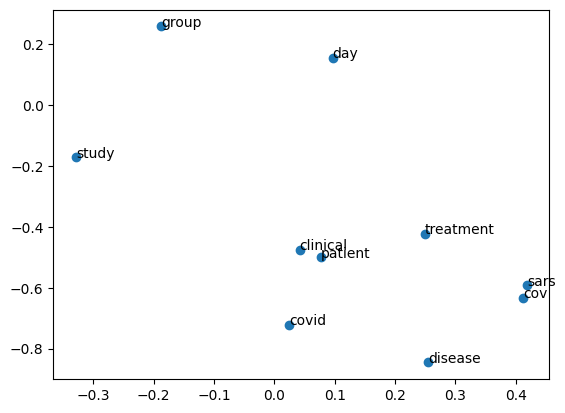

In [140]:
X = skipgram.wv[skipgram.wv.index_to_key]    #stroing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

#words embeddings on the plot to check 2-D representation of each word
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## PCA Plot - FastText

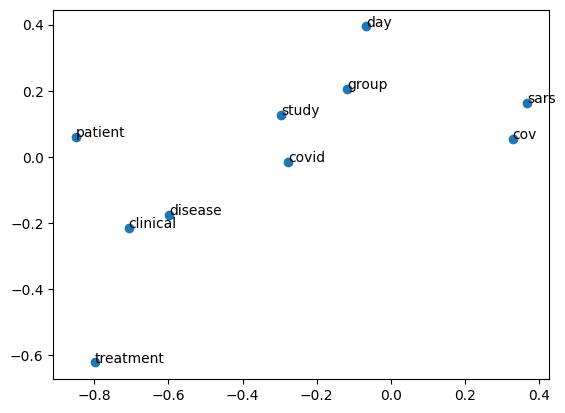

In [141]:
#same thing as above but with fasttext model
X_fast = FastText_model.wv[FastText_model.wv.index_to_key]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText_model.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show()

## Getting Vectors for each abstract

In [142]:
vector_size=100   #defining vector size for each word

## Method 1 - Slower

In [ ]:
#function to take average of all vectors of each word in abstract, so that each abstract can represent (1,100) dimensional vector

K1=[]      #creating list to store vector representation of each abstract

for i in range(covid.shape[0]):       #iterating through all abstract
    K=np.zeros([vector_size,1])    #creating empty array of size (vec_size,1) to add vector representation of each word
    count=0                        #creating count to check how many words are used from abstract
    
    for word in covid['Abstract'][i]:   #iterating through all words in given abstract

        if word in list(FastText_model.wv.index_to_key):      #if word exists in vocab , increase count by 1 and add array of given words in our defined array K

            count+=1
            K+=FastText_model.wv[word].reshape(vector_size,1)
    K=K/count                                        #taking average of given array
    K1.append(list(K))                               #appending vector of given abstract to the initial defined list
K1_array=np.array(K1)
K1_array=K1_array.reshape(covid.shape[0],vector_size)   #converting into array of shape(no. of rows, vector_size)

## Method 2 - Faster

In [145]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in list(word2vec_model.wv.index_to_key)] #if word is in vocab 
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)


### Abstract to vectors using skipgram Model

In [146]:
K1=[]                                     #defining empty list
for i in covid.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list
    
    
K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('skipgram-vec.csv')

In [147]:
K=pd.read_csv('skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(covid.shape[0]):
    skipgram_vectors.append(K[str(i)].values)
 

### For converting Title into vectors using skipgram

In [148]:
K1_title=[]
for i in covid.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))    

    
K1_title=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title.to_csv('skipgram-vec-title.csv')    

In [149]:
K=pd.read_csv('skipgram-vec-title.csv')   #Loading our pretrained vectors of each abstract

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(covid.shape[0]):
    K2_title.append(K[str(i)].values)

### Abstract to vector using FastText 

In [157]:
K_fast=[]                                     #defining empty list
for i in covid.Abstract:
    K_fast.append(list(get_mean_vector(FastText_model, i)))     #appending array to the list
    
K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('FastText-vec.csv')

In [158]:
data=pd.read_csv('FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(covid.shape[0]):
    fast_vectors.append(data[str(i)].values)

## Cosine Similarity Function

In [159]:
#defining function to define cosine similarity

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b)) 

## Input Query Processing

In [160]:
#Preprocessing input, because input should be in same form as training data set


def preprocessing_input(query,word2vec_model):
    query=preprocess_text(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)
    return K   

In [161]:
#function to return top n similar results

#query - input query
# p - average vectors for all abs
#df1 - original

def top_n(query,p,df1,model):    
    print(query)
    
    query=preprocessing_input(query,model)    #preprocessing input to list of vectors
                                    
    x=[]
    #Converting cosine similarities of overall data set with input queries into LIST
    for i in range(len(p)):
        x.append(cos_sim(query,p[i]))
    
    
 #store list in tmp to retrieve index
    tmp=list(x)
    
 #sort list so that largest elements are on the far right
    
    res = sorted(range(len(x)), key = lambda sub: x[sub])[-5:]
    sim=[tmp[i] for i in reversed(res)]
    print(sim)
 #get index of the 10 or n largest element
    L=[]
    for i in reversed(res):
    
        L.append(i)
    return df1.iloc[L, [1,2,5,6]],sim     #returning dataframe (only id,title,abstract ,publication date)

## Result Evaluation

In [162]:
# skipgram model

#Input your search query here

Query = "lung failure"

Results,sim = top_n(Query,skipgram_vectors,covid_bk,skipgram)
Results

lung failure
[0.9473805503741747, 0.943206954717338, 0.7037638574155378, 0.6943897696196195, 0.6753012221143019]


,Trial ID,Title,Abstract,Publication date
5496,CTRI/2020/08/027008,Use of artificial intelligence(AI) in detectio...,Modification(s) AI b a s e d Me d i c a l D i ...,2020-08-17
6089,CTRI/2020/07/026355,Evaluation Of The Efficacy of AYUSH KWATH in T...,CO V I D - 1 9 i s a b i gge st pan d e m i c ...,2020-07-14
5701,EUPAS34985,“ESTUDIO DE COHORTES OBSERVACIONAL: USO DE TOC...,"Estudio observacional retrospectivo, con el ob...",2020-04-28
8070,CTRI/2020/04/024904,Randomised Controlled Trial to compare efficac...,Study Rationale The study will follow all guid...,2020-05-11
7494,2020-001573-78,Recombinant InterLeukin-7 CYT107 to Improve cl...,SARSCo-V-2,2020-04-17


In [164]:
# fasttext model

#Input your search query here

Query = "lung failure"

Results,sim=top_n(Query,fast_vectors,covid_bk,FastText_model)
Results

lung failure
[0.9230261676735297, 0.9095492045057938, 0.7035583058565762, 0.6888847744755169, 0.665191593823712]


,Trial ID,Title,Abstract,Publication date
5496,CTRI/2020/08/027008,Use of artificial intelligence(AI) in detectio...,Modification(s) AI b a s e d Me d i c a l D i ...,2020-08-17
6089,CTRI/2020/07/026355,Evaluation Of The Efficacy of AYUSH KWATH in T...,CO V I D - 1 9 i s a b i gge st pan d e m i c ...,2020-07-14
8070,CTRI/2020/04/024904,Randomised Controlled Trial to compare efficac...,Study Rationale The study will follow all guid...,2020-05-11
5701,EUPAS34985,“ESTUDIO DE COHORTES OBSERVACIONAL: USO DE TOC...,"Estudio observacional retrospectivo, con el ob...",2020-04-28
2672,CTRI/2021/01/030212,Management of complications of esophageal fore...,"<!-- /* Style Definitions */ p.MsoNormal, li.M...",2021-01-11


In [165]:
# skipgram model

#Input your search query here

Query = "breathe"

Results,sim = top_n(Query,skipgram_vectors,covid_bk,skipgram)
Results

breathe
[0.9424678928350642, 0.9361186307129704, 0.6956916868765453, 0.6953460238478779, 0.6903798971644537]


,Trial ID,Title,Abstract,Publication date
5496,CTRI/2020/08/027008,Use of artificial intelligence(AI) in detectio...,Modification(s) AI b a s e d Me d i c a l D i ...,2020-08-17
6089,CTRI/2020/07/026355,Evaluation Of The Efficacy of AYUSH KWATH in T...,CO V I D - 1 9 i s a b i gge st pan d e m i c ...,2020-07-14
6106,NCT04470297,Adjuvant Therapeutic Effects of Melatonin Agon...,COVID-19 is impacting on health systems in Bra...,2020-09-01
8070,CTRI/2020/04/024904,Randomised Controlled Trial to compare efficac...,Study Rationale The study will follow all guid...,2020-05-11
7494,2020-001573-78,Recombinant InterLeukin-7 CYT107 to Improve cl...,SARSCo-V-2,2020-04-17


In [167]:
# fasttext model

#Input your search query here

Query = "cure"

Results,sim=top_n(Query,fast_vectors,covid_bk,FastText_model)
Results

cure
[0.9033666164370302, 0.8845142863727361, 0.6837211179172534, 0.6821169367242654, 0.670976804014449]


,Trial ID,Title,Abstract,Publication date
5496,CTRI/2020/08/027008,Use of artificial intelligence(AI) in detectio...,Modification(s) AI b a s e d Me d i c a l D i ...,2020-08-17
6089,CTRI/2020/07/026355,Evaluation Of The Efficacy of AYUSH KWATH in T...,CO V I D - 1 9 i s a b i gge st pan d e m i c ...,2020-07-14
8070,CTRI/2020/04/024904,Randomised Controlled Trial to compare efficac...,Study Rationale The study will follow all guid...,2020-05-11
5701,EUPAS34985,“ESTUDIO DE COHORTES OBSERVACIONAL: USO DE TOC...,"Estudio observacional retrospectivo, con el ob...",2020-04-28
1289,DRKS00024184,Hyposmia during childhood - differences betwee...,In cooperation with the Center of Pediatrics o...,2021-03-05
